In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
# import liblary untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#liblary untuk forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('/content/totalsales_harian.csv')
df.head() # Menampilkan Data

,Date,Total_Value_Sales
0,2022-01-01,10113457.00
1,2022-01-02,8342409.00
2,2022-01-03,12981272.99
3,2022-01-04,11580124.00
4,2022-01-05,11577690.91


In [4]:
df.tail() #melihat baris-baris terakhir dalam dataset

,Date,Total_Value_Sales
572,2023-07-27,2.005839e+07
573,2023-07-28,1.472311e+07
574,2023-07-29,1.240325e+07
575,2023-07-30,1.361546e+07
576,2023-07-31,1.072016e+08


In [5]:
# cek data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               577 non-null    object 
 1   Total_Value_Sales  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [6]:
# cek data description
df.describe()

,Total_Value_Sales
count,5.770000e+02
mean,2.106417e+07
std,1.932996e+07
min,2.353072e+06
25%,1.284149e+07
50%,1.654412e+07
75%,2.195194e+07
max,2.132649e+08


In [7]:
# Menampilkan tanggal awal dan tanggal akhir
tanggal_awal = df['Date'].min()
tanggal_akhir = df['Date'].max()

In [8]:

print(f'Tanggal Awal: {tanggal_awal}')
print(f'Tanggal Akhir: {tanggal_akhir}')

Tanggal Awal: 2022-01-01
Tanggal Akhir: 2023-07-31


# **transform data**

In [9]:
# Mengubah kolom 'Date' menjadi tipe data datetime dengan format "tahun-bulan-hari"
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [10]:
#set tanggal sebagai index
df.set_index('Date', inplace=True)

In [11]:
df.head()

,Total_Value_Sales
Date,
2022-01-01,10113457.00
2022-01-02,8342409.00
2022-01-03,12981272.99
2022-01-04,11580124.00
2022-01-05,11577690.91


In [12]:
df.index.min(),df.index.max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2023-07-31 00:00:00'))

In [13]:
import pandas as pd

# Menghasilkan rentang tanggal yang diinginkan
date_range = pd.date_range(start='2022-01-01', end='2023-07-31')

# Memeriksa apakah semua tanggal dalam rentang tersebut ada dalam indeks DataFrame
data_continuity = all(date in df.index for date in date_range)

if data_continuity:
    print("Data kontinu dari {} sampai {}".format(df.index.min(), df.index.max()))
else:
    print("Data tidak kontinu di seluruh rentang dari {} sampai {}".format(df.index.min(), df.index.max()))


Data kontinu dari 2022-01-01 00:00:00 sampai 2023-07-31 00:00:00


In [14]:
import pandas as pd

# Misalkan df adalah DataFrame Anda

# Mengatur frekuensi indeks DataFrame menjadi harian (D)
df = df.asfreq('D')


# **Analisa Time Series**

<Axes: xlabel='Date'>

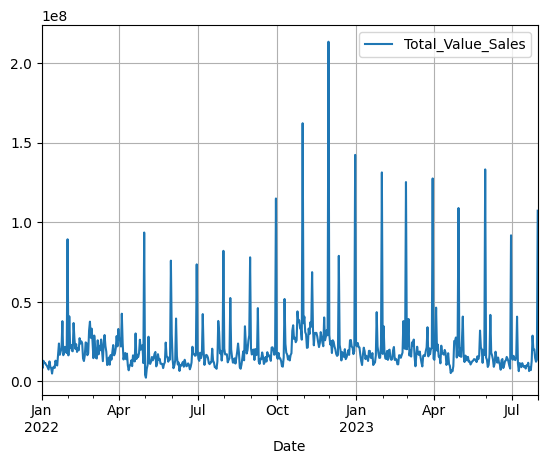

In [15]:
df.plot(grid=True)

In [16]:
import pandas as pd

# Misalkan df adalah DataFrame Anda dengan indeks berupa tanggal

# Tentukan rentang waktu untuk data latihan dan data pengujian
train_start_date = '2022-01-01'
train_end_date = '2023-05-31'  # Misalnya, memilih data hingga 31 Mei 2023 untuk latihan
test_start_date = '2023-06-01'
test_end_date = '2023-07-31'  # Data dari 1 Juni 2023 hingga 31 Juli 2023 untuk pengujian

# Bagi DataFrame menjadi data latihan dan data pengujian
train_df = df.loc[train_start_date:train_end_date]
test_df = df.loc[test_start_date:test_end_date]


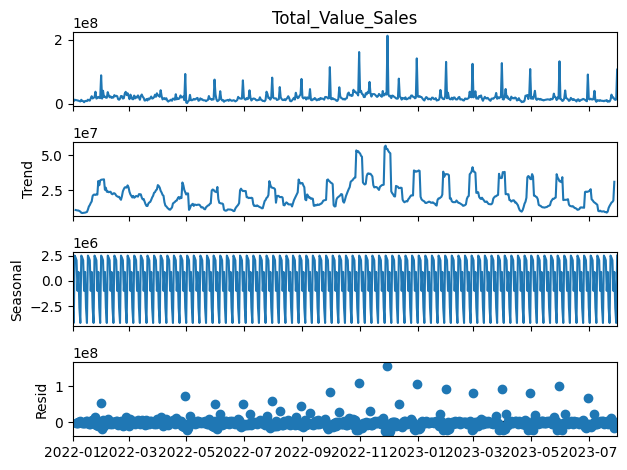

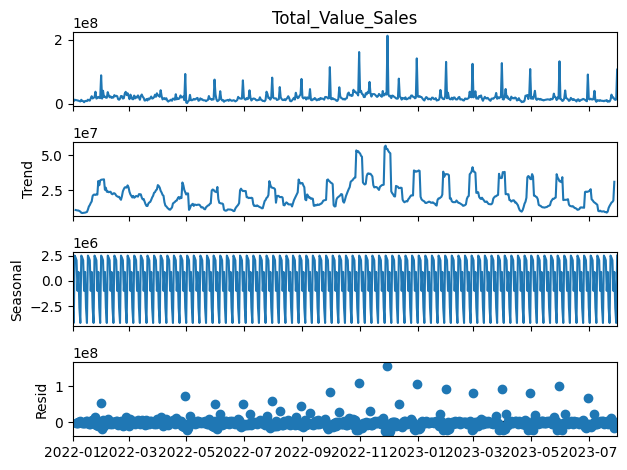

In [17]:
#Pendekomposisian Musiman: menggunakan seasonal_decompose dari statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_add = seasonal_decompose(df['Total_Value_Sales'])
decompose_add.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(timeseries):
    print ('Hasil Testing Dickey-Fuller')
    print ('----------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observation Used'])
    for key, value in adftest[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)  # Pindahkan pernyataan print ke dalam fungsi

adf_test(df.values)


Hasil Testing Dickey-Fuller
----------------------------------
Test Statistic               -7.313547e+00
p-value                       1.246208e-10
Lags Used                     5.000000e+00
Number of Observation Used    5.710000e+02
Critical Value (1%)          -3.441854e+00
Critical Value (5%)          -2.866615e+00
Critical Value (10%)         -2.569473e+00
dtype: float64


In [19]:
diff_df = df.diff()
diff_df.head()

,Total_Value_Sales
Date,
2022-01-01,NaN
2022-01-02,-1771048.00
2022-01-03,4638863.99
2022-01-04,-1401148.99
2022-01-05,-2433.09


In [20]:
diff_df.dropna(inplace=True)

<Axes: xlabel='Date'>

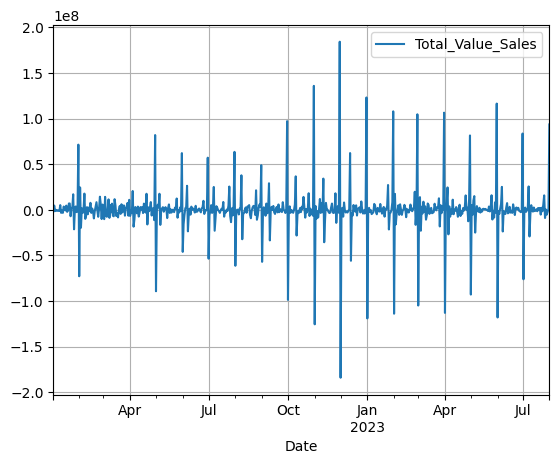

In [21]:
diff_df.plot(grid=True)

In [22]:
adf_test(diff_df)

Hasil Testing Dickey-Fuller
----------------------------------
Test Statistic               -1.099724e+01
p-value                       6.822379e-20
Lags Used                     1.000000e+01
Number of Observation Used    5.650000e+02
Critical Value (1%)          -3.441977e+00
Critical Value (5%)          -2.866669e+00
Critical Value (10%)         -2.569502e+00
dtype: float64


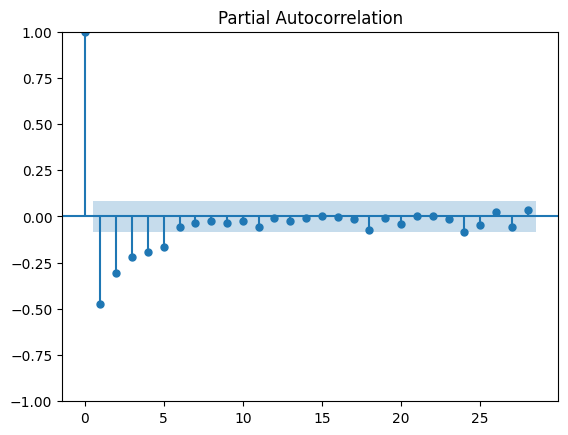

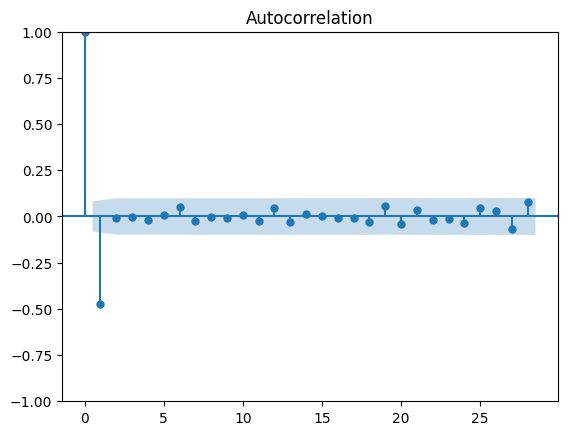

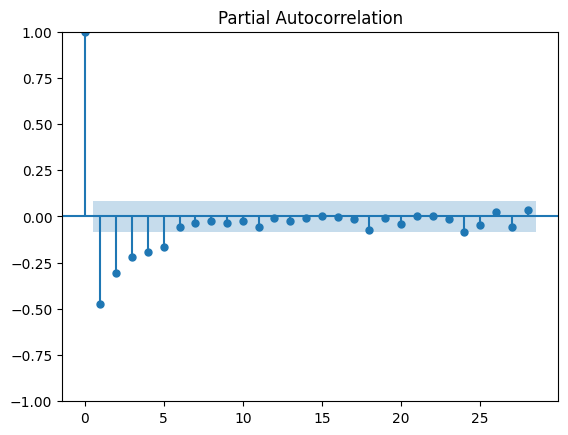

In [23]:
plot_acf(diff_df)
plot_pacf(diff_df)

# **Singgle Exponential Smmoothing**

In [24]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(61)

<Axes: xlabel='Date'>

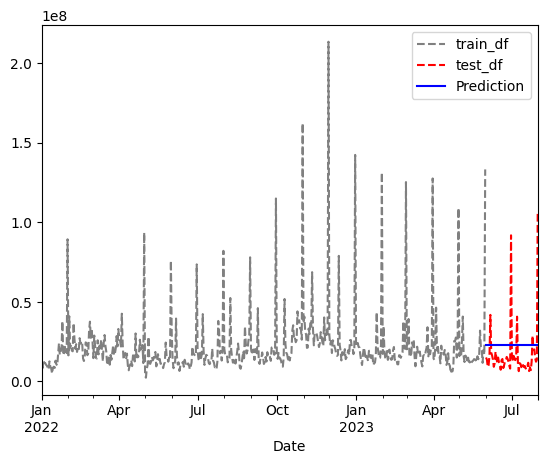

In [25]:
train_df['Total_Value_Sales'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Total_Value_Sales'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [26]:
# Memeriksa jumlah sampel pada data pengujian (test_df)
num_samples_test_df = len(test_df)

# Memeriksa jumlah sampel pada prediksi data pengujian (single_exp_test_pred)
num_samples_single_exp_test_pred = len(single_exp_test_pred)

# Membandingkan jumlah sampel data pengujian dengan jumlah sampel prediksi
print("Jumlah sampel pada test_df:", num_samples_test_df)
print("Jumlah sampel pada single_exp_test_pred:", num_samples_single_exp_test_pred)


Jumlah sampel pada test_df: 61
Jumlah sampel pada single_exp_test_pred: 61


In [27]:
print('Single Exonential Smoothing')
print('Train RMSE :', mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train Mape :', mean_absolute_error(train_df, single_exp_train_pred))
print('Test Mape :', mean_absolute_error(test_df, single_exp_test_pred))

Single Exonential Smoothing
Train RMSE : 19408780.80078884
Test RMSE : 17918759.737164278
Train Mape : 9269581.721499132
Test Mape : 13101847.459214974


# **Double Exponential Smmoothing**

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Exponential Smoothing
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()

# Membuat prediksi untuk data latihan
double_exp_train_pred = double_exp.fittedvalues

# Membuat prediksi untuk data pengujian (dalam contoh ini, 61 periode)
double_exp_test_pred = double_exp.forecast(steps=61)


<Axes: xlabel='Date'>

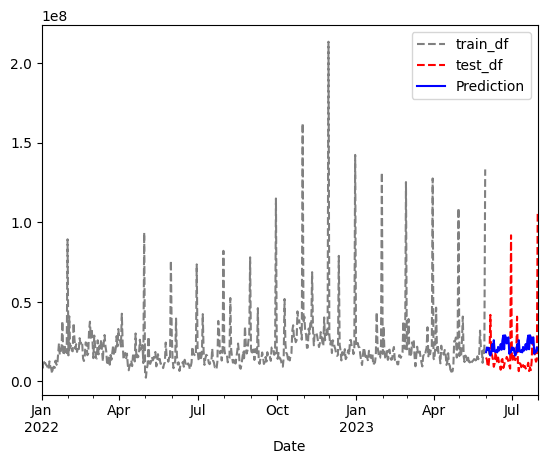

In [29]:
train_df['Total_Value_Sales'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Total_Value_Sales'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [30]:
print('Double Exonential Smoothing')
print('Train RMSE :', mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train Mape :', mean_absolute_error(train_df, double_exp_train_pred))
print('Test Mape :', mean_absolute_error(test_df, double_exp_test_pred))

Double Exonential Smoothing
Train RMSE : 20142648.20860999
Test RMSE : 18310556.59015176
Train Mape : 9921280.162493872
Test Mape : 12012115.717974467


# **ARIMA**

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Membuat dan melatih model ARIMA
ar = ARIMA(train_df, order=(15, 1, 15)).fit()

# Membuat prediksi untuk data latihan
ar_train_pred = ar.fittedvalues

# Membuat prediksi untuk data pengujian (dalam contoh ini, 61 periode)
ar_test_pred = ar.forecast(steps=61)


<Axes: xlabel='Date'>

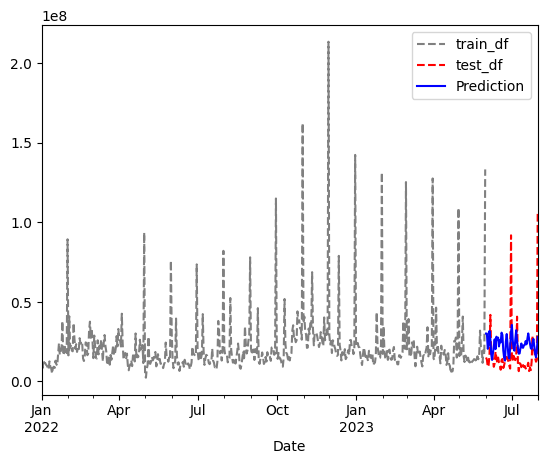

In [32]:
train_df['Total_Value_Sales'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Total_Value_Sales'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='Prediction')

In [33]:
print('ARIMA')
print('Train RMSE :', mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train Mape :', mean_absolute_error(train_df, ar_train_pred))
print('Test Mape :', mean_absolute_error(test_df, ar_test_pred))

ARIMA
Train RMSE : 18311242.541342497
Test RMSE : 17491674.744853396
Train Mape : 9340434.69148331
Test Mape : 12852575.12589245


## **XGbost**

In [1]:
pip install xgboost


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577 entries, 2022-01-01 to 2023-07-31
Freq: D
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total_Value_Sales  577 non-null    float64
dtypes: float64(1)
memory usage: 25.2 KB


In [37]:
import xgboost as xgb

# Menentukan fitur dan target untuk data latihan
X_train = train_df.index.values.astype(int).reshape(-1, 1)  # Mengubah indeks menjadi nilai integer
y_train = train_df['Total_Value_Sales'].values

# Menentukan fitur untuk data pengujian
X_test = test_df.index.values.astype(int).reshape(-1, 1)  # Mengubah indeks pengujian menjadi nilai integer

# Inisialisasi dan melatih model XGBoost
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

# Membuat prediksi untuk data pengujian
y_test_pred = model_xgb.predict(X_test)

# Inisialisasi dan melatih model XGBoost dengan data latihan
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

# Membuat prediksi untuk data pengujian (dalam contoh ini, 61 periode)
# Menggunakan tanggal setelah test_end_date untuk membuat prediksi
future_dates = pd.date_range(start=test_end_date, periods=61, freq='D')
X_future = future_dates.values.astype(int).reshape(-1, 1)  # Mengubah indeks pengujian menjadi nilai integer
y_future_pred = model_xgb.predict(X_future)


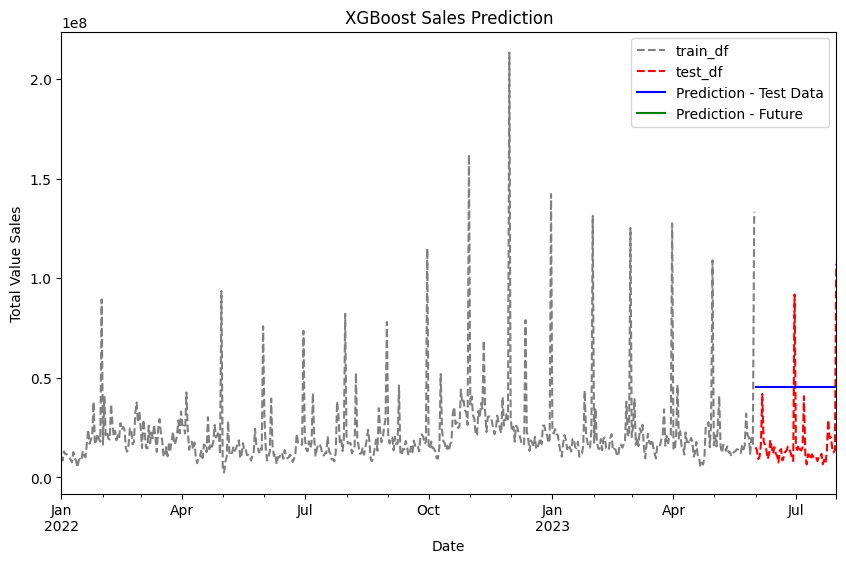

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

# Visualisasi data latihan, data pengujian, dan prediksi untuk 61 periode ke depan
plt.figure(figsize=(10, 6))

# Plot data latihan dan data pengujian
train_df['Total_Value_Sales'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Total_Value_Sales'].plot(style='--', color='r', legend=True, label='test_df')

# Plot prediksi untuk data pengujian
plt.plot(test_df.index, y_test_pred, color='b', label='Prediction - Test Data')

# Plot prediksi untuk 61 periode ke depan
future_dates = pd.date_range(start=test_end_date, periods=61, freq='D')
plt.plot(future_dates, y_future_pred, color='g', label='Prediction - Future')

plt.xlabel('Date')
plt.ylabel('Total Value Sales')
plt.title('XGBoost Sales Prediction')
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Menghitung RMSE dan MAPE untuk data latihan
train_rmse = mean_squared_error(y_train, model_xgb.predict(X_train)) ** 0.5
train_mape = mean_absolute_error(y_train, model_xgb.predict(X_train))

# Menghitung RMSE dan MAPE untuk data pengujian
test_rmse = mean_squared_error(test_df['Total_Value_Sales'], y_test_pred) ** 0.5
test_mape = mean_absolute_error(test_df['Total_Value_Sales'], y_test_pred)

# Menampilkan hasil RMSE dan MAPE
print('Train RMSE:', train_rmse)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAPE:', test_mape)


Train RMSE: 13501143.981509713
Train MAPE: 5592730.224786823
Test RMSE: 33240931.982072476
Test MAPE: 32353291.16213114


# **Perbandingan Algoritma**

In [40]:
comparison_df = pd.DataFrame(data=[
    ['Single Exp Smoothing', 17918759.737164278, 13101847.459214974],
    ['Double Exp Smoothing', 18310556.59015176, 12012115.717974467],
    ['ARIMA', 17491674.744853396, 12852575.12589245],
    ['XGBOOST',33240931.982072476,32353291.16213114],
], columns=['Model', 'RMSE', 'MAPE'])

comparison_df.set_index('Model', inplace=True)


In [41]:
comparison_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
ARIMA,1.749167e+07,1.285258e+07
Single Exp Smoothing,1.791876e+07,1.310185e+07
Double Exp Smoothing,1.831056e+07,1.201212e+07
XGBOOST,3.324093e+07,3.235329e+07


In [140]:
import pickle


In [141]:
pickle.dump(ar, open('prediksi_sales.sav','wb'))

In [112]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Total_Value_Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -7.31354664397237
p-value: 1.246208216536852e-10


Dengan hasil ADF Statistic yang negatif dan p-value yang sangat rendah, dapat disimpulkan bahwa data Total_Value_Sales yang Anda uji adalah stasioner.


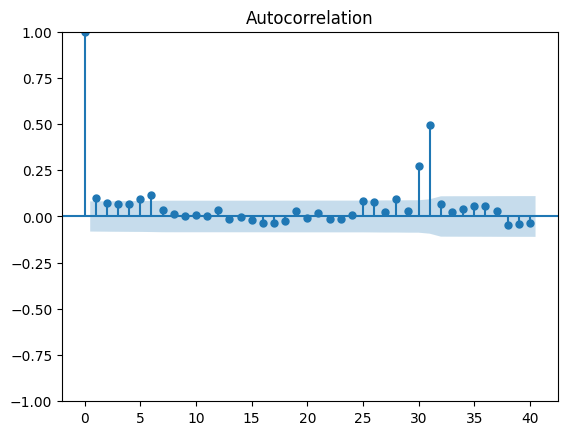

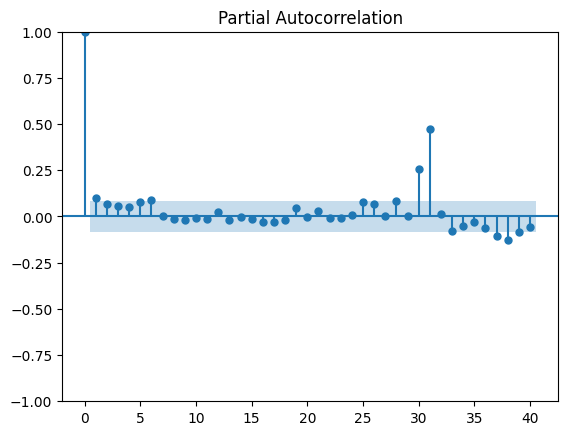

In [46]:
#Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF): menggunakan plot_acf dan plot_pacf
# untuk memeriksa korelasi otokorelasi dalam data time series. Ini berguna dalam menentukan model ARIMA yang sesuai
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df['Total_Value_Sales'], lags=40, ax=plt.gca())
plt.show()
plot_pacf(df['Total_Value_Sales'], lags=40, ax=plt.gca())
plt.show()

Nilai ACF:
[ 1.          0.09796132  0.07559584  0.06799743  0.06522969  0.09469402
  0.11446769  0.03750251  0.01409142  0.00242109  0.00877591  0.0032604
  0.03548774 -0.01207248 -0.00386547 -0.01757807 -0.03496405 -0.03566089
 -0.02679415  0.02980711 -0.01033517  0.01861042 -0.01399516 -0.01332386
  0.00837264  0.08177763  0.07881292  0.02505362  0.09457537  0.02813165
  0.27304734  0.49321805  0.06553196  0.02464944  0.04167728  0.05565477
  0.05708797  0.02776303 -0.0440744  -0.04309524 -0.03338095]

Nilai PACF:
[ 1.          0.09813139  0.06687299  0.0556262   0.0503974   0.07863788
  0.09249367  0.00486572 -0.01363003 -0.02008118 -0.00932271 -0.01489725
  0.02521815 -0.01976965 -0.00273672 -0.01615577 -0.03340487 -0.03217656
 -0.02076607  0.04765201 -0.00303752  0.03283987 -0.00653916 -0.0058315
  0.00811852  0.08161056  0.0697517   0.00417453  0.08969809  0.00206261
  0.2712072   0.50557609  0.02668366 -0.07925787 -0.05338101 -0.03012903
 -0.06979968 -0.12232789 -0.15519698 -0.

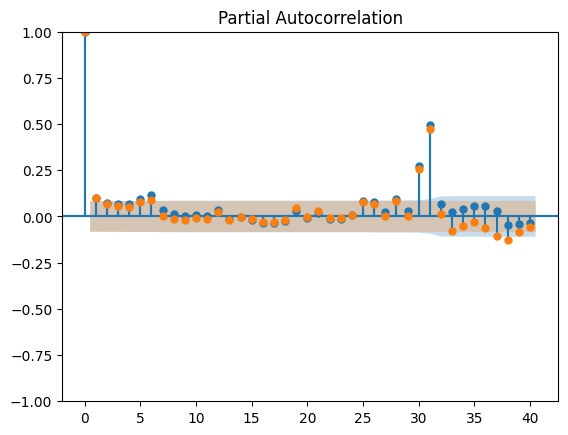

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Menghitung ACF dan PACF
lag = 40  # Jumlah lag yang ingin Anda hitung
acf_values = acf(df['Total_Value_Sales'], nlags=lag)
pacf_values = pacf(df['Total_Value_Sales'], nlags=lag)

# Menampilkan nilai-nilai ACF
print("Nilai ACF:")
print(acf_values)

# Menampilkan nilai-nilai PACF
print("\nNilai PACF:")
print(pacf_values)

# Menampilkan grafik ACF dan PACF
plot_acf(df['Total_Value_Sales'], lags=lag, ax=plt.gca())
plot_pacf(df['Total_Value_Sales'], lags=lag, ax=plt.gca())
plt.show()


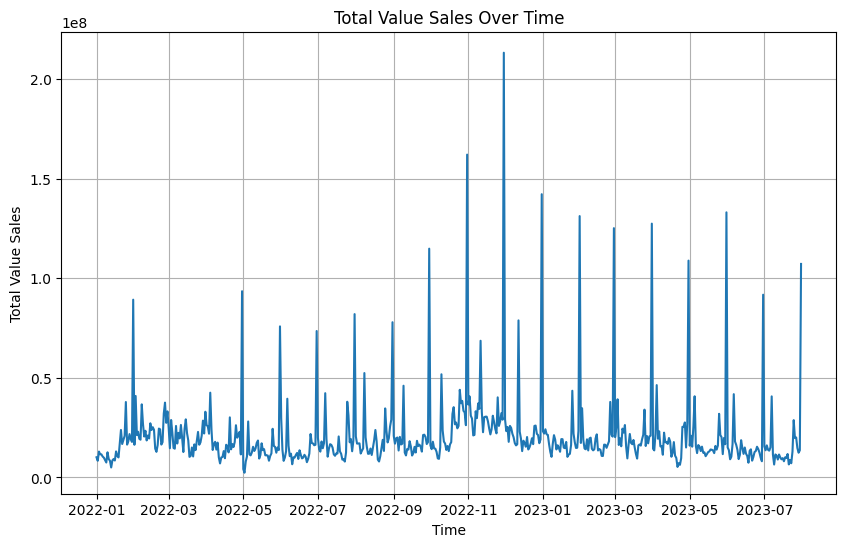

In [48]:
# Visualisasi Data Time Series
plt.figure(figsize=(10, 6))
plt.plot(df['Total_Value_Sales'])
plt.title('Total Value Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Total Value Sales')
plt.grid(True)
plt.show()

In [49]:
# Statistik Deskriptif
desc_stats = df['Total_Value_Sales'].describe()
print(desc_stats)


count    5.770000e+02
mean     2.106417e+07
std      1.932996e+07
min      2.353072e+06
25%      1.284149e+07
50%      1.654412e+07
75%      2.195194e+07
max      2.132649e+08
Name: Total_Value_Sales, dtype: float64


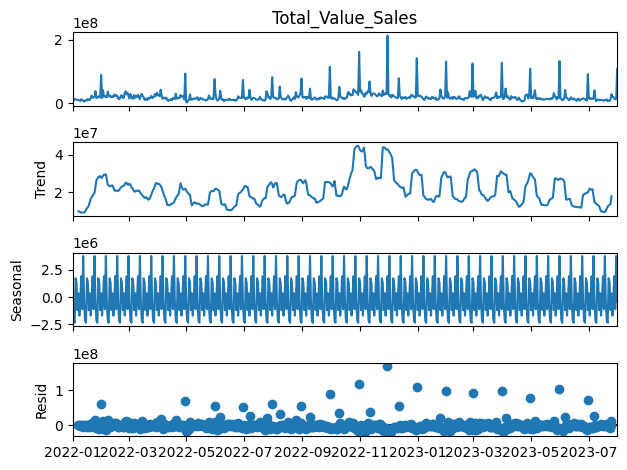

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekomposisi data time series
result = seasonal_decompose(df['Total_Value_Sales'], model='additive', period=12)  # Ganti 'additive' dengan 'multiplicative' jika cocok
result.plot()
plt.show()


In [51]:
from scipy.stats import kstest

# Menggunakan uji Kolmogorov-Smirnov
kstest_result = kstest(df['Total_Value_Sales'], 'norm')
print("Hasil Uji Kolmogorov-Smirnov:")
print("Statistic:", kstest_result.statistic)
print("p-value:", kstest_result.pvalue)


Hasil Uji Kolmogorov-Smirnov:
Statistic: 1.0
p-value: 0.0


In [52]:
from scipy.stats import shapiro

# Menggunakan uji Shapiro-Wilk
shapiro_result = shapiro(df['Total_Value_Sales'])
print("\nHasil Uji Shapiro-Wilk:")
print("Test Statistic:", shapiro_result.statistic)
print("p-value:", shapiro_result.pvalue)



Hasil Uji Shapiro-Wilk:
Test Statistic: 0.5032147765159607
p-value: 3.110546951792919e-37


In [17]:
tanggal_akhir = df.index[-1]
print("Tanggal terakhir dalam indeks:", tanggal_akhir)

Tanggal terakhir dalam indeks: 2023-07-31 00:00:00


# **forecasting dengan data yang di normalisasi**

In [78]:
# Menggunakan metode IQR (Interquartile Range) untuk mendeteksi outlier
Q1 = df['Total_Value_Sales'].quantile(0.25)
Q3 = df['Total_Value_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Total_Value_Sales'] < lower_bound) | (df['Total_Value_Sales'] > upper_bound)]

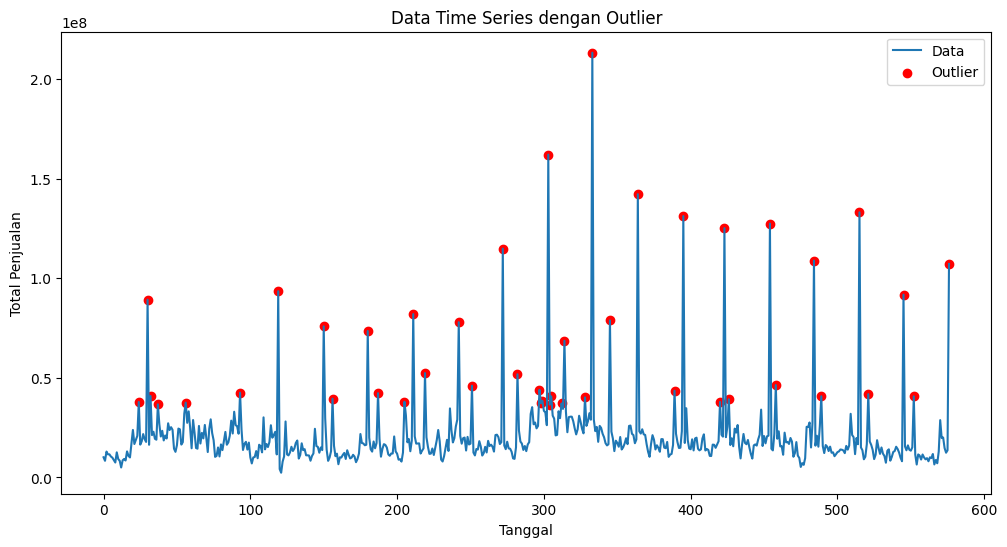

In [79]:
# Visualisasi outlier
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total_Value_Sales'], label='Data')
plt.scatter(outliers.index, outliers['Total_Value_Sales'], color='red', label='Outlier')
plt.title('Data Time Series dengan Outlier')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.legend()
plt.show()


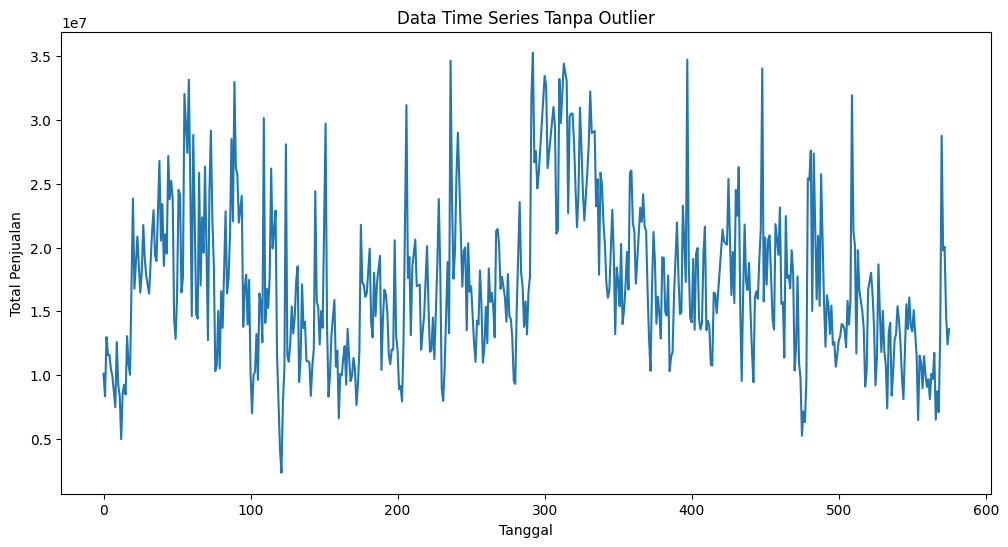

In [80]:
# Menghapus outlier dari data
df_cleaned = df[~df.index.isin(outliers.index)]

# Visualisasi data yang sudah dibersihkan
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['Total_Value_Sales'])
plt.title('Data Time Series Tanpa Outlier')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.show()


In [31]:
Q1 = df['Total_Value_Sales'].quantile(0.25)
Q3 = df['Total_Value_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier berdasarkan batasan
df = df[(df['Total_Value_Sales'] >= lower_bound) & (df['Total_Value_Sales'] <= upper_bound)]


In [72]:
from scipy import stats
from scipy.stats import shapiro

# Menentukan nilai lambda terbaik
best_lambda, max_log_likelihood = stats.boxcox(df['Total_Value_Sales'])

# Melakukan transformasi Box-Cox pada data
boxcox_transformed_data = stats.boxcox(df['Total_Value_Sales'], lmbda=best_lambda)

# Uji normalitas pada data yang telah di-transformasi
stat, p = shapiro(boxcox_transformed_data)

if p > 0.05:
    print("Data setelah transformasi Box-Cox terdistribusi normal.")
else:
    print("Data setelah transformasi Box-Cox tidak terdistribusi normal.")

Data setelah transformasi Box-Cox tidak terdistribusi normal.


In [73]:
# Melakukan peramalan
forecast_steps = 180  # Gantilah 20 dengan jumlah periode yang ingin Anda prediksi
forecast_arima = arima_results.forecast(steps=forecast_steps)

# Evaluasi Model ARIMA
actual_data = df['Total_Value_Sales'][-forecast_steps:]
mse_arima = mean_squared_error(actual_data, forecast_arima)
mae_arima = mean_absolute_error(actual_data, forecast_arima)

print("Evaluasi Model ARIMA:")
print(f"MSE: {mse_arima}")
print(f"MAE: {mae_arima}")


Evaluasi Model ARIMA:
MSE: 371360553507518.25
MAE: 8840467.224657057


In [74]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Daftar parameter ARIMA yang akan dicoba
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Mencari parameter ARIMA terbaik dengan lowest AIC
best_aic = float('inf')
best_order = None

for order in pdq:
    try:
        model = ARIMA(df['Total_Value_Sales'], order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue

# Membuat model ARIMA terbaik
arima_model = ARIMA(df['Total_Value_Sales'], order=best_order)
arima_results = arima_model.fit()

# Melakukan peramalan
forecast_arima = arima_results.forecast(steps=180)  # Gantilah N dengan jumlah periode yang ingin Anda prediksi


In [75]:
# Melakukan peramalan
forecast_steps = 180  # Ganti 20 dengan jumlah periode yang ingin Anda prediksi
forecast_arima = arima_results.forecast(steps=forecast_steps)

# Cetak peramalan
print("Peramalan 180 hari ke depan:")
print(forecast_arima)

Peramalan 180 hari ke depan:
577    2.467560e+07
578    2.356408e+07
579    2.268489e+07
580    2.198947e+07
581    2.143941e+07
           ...     
752    1.935787e+07
753    1.935787e+07
754    1.935787e+07
755    1.935787e+07
756    1.935787e+07
Name: predicted_mean, Length: 180, dtype: float64


In [67]:

# Menyimpan hasil peramalan ke dalam variabel
hasil_peramalan = forecast_arima.tolist()

# Melakukan manipulasi atau analisis tambahan (opsional)
# Misalnya, menghitung rata-rata hasil peramalan
rata_rata_peramalan = sum(hasil_peramalan) / len(hasil_peramalan)
print("Rata-rata hasil peramalan:", rata_rata_peramalan)


Rata-rata hasil peramalan: 19499208.10703852


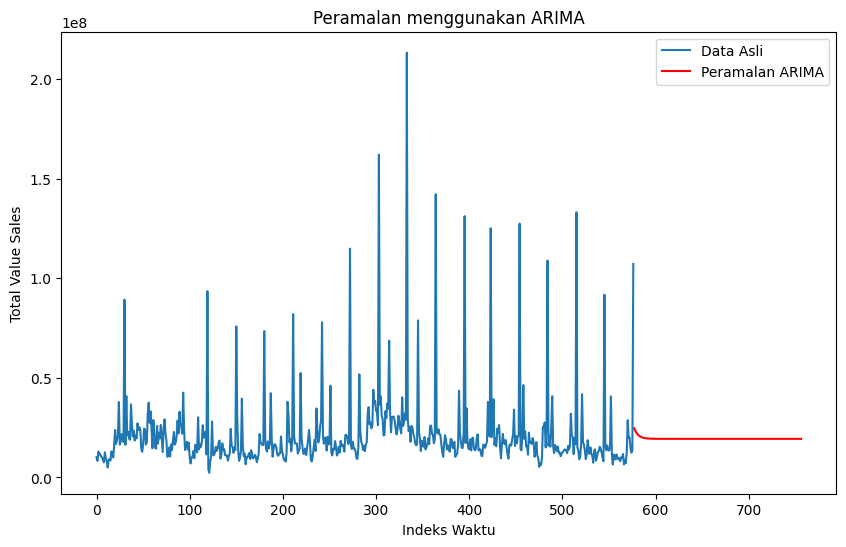

In [76]:
import matplotlib.pyplot as plt

# Melakukan peramalan
forecast_steps = 180  # Ganti 180 dengan jumlah periode yang ingin Anda prediksi
forecast_arima = arima_results.forecast(steps=forecast_steps)

# Visualisasi hasil peramalan
plt.figure(figsize=(10, 6))
plt.plot(df['Total_Value_Sales'], label='Data Asli')  # Ganti 'Total_Value_Sales' dengan nama kolom data asli Anda
plt.plot(range(len(df['Total_Value_Sales']), len(df['Total_Value_Sales']) + forecast_steps), forecast_arima, color='red', label='Peramalan ARIMA')
plt.xlabel('Indeks Waktu')
plt.ylabel('Total Value Sales')
plt.title('Peramalan menggunakan ARIMA')
plt.legend()
plt.show()


In [82]:
last_index = df_cleaned.index[-1]
print("Index terakhir:", last_index)


Index terakhir: 575


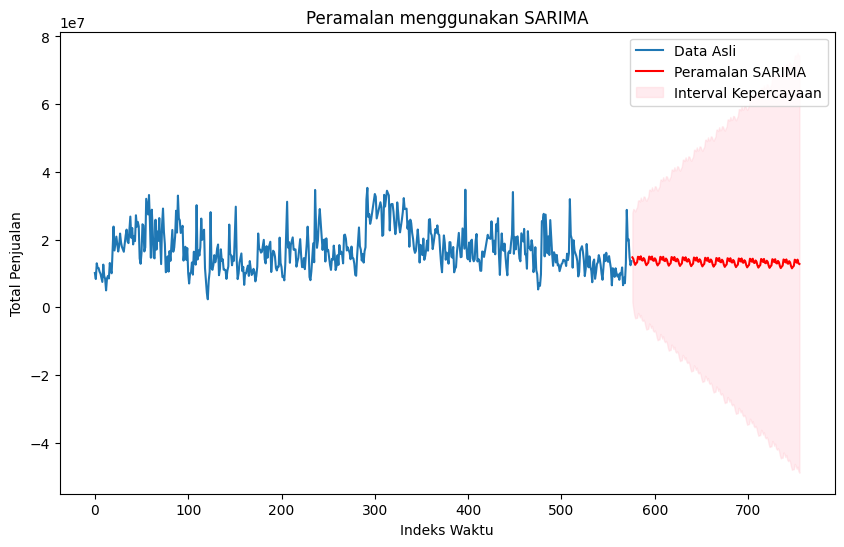

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Anda memiliki index terakhir, misalnya 575
last_index = 575

# Memisahkan data untuk peramalan
data_for_forecast = df_cleaned['Total_Value_Sales']

# Menentukan parameter SARIMA
order = (3, 1, 2)  # Parameter untuk komponen non-musiman
seasonal_order = (1, 1, 1, 12)  # Parameter untuk komponen musiman (P, D, Q, s)

# Membuat model SARIMA
sarima_model = SARIMAX(data_for_forecast[:last_index + 1], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Melakukan peramalan
forecast_steps = 180  # Ganti 180 dengan jumlah periode yang ingin Anda prediksi
forecast_sarima = sarima_results.get_forecast(steps=forecast_steps)

# Mendapatkan interval kepercayaan
conf_int = forecast_sarima.conf_int()

# Visualisasi hasil peramalan
plt.figure(figsize=(10, 6))
plt.plot(data_for_forecast, label='Data Asli')
plt.plot(range(last_index + 1, last_index + 1 + forecast_steps), forecast_sarima.predicted_mean, color='red', label='Peramalan SARIMA')
plt.fill_between(range(last_index + 1, last_index + 1 + forecast_steps), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Interval Kepercayaan')
plt.xlabel('Indeks Waktu')
plt.ylabel('Total Penjualan')
plt.title('Peramalan menggunakan SARIMA')
plt.legend()
plt.show()